# Chapter 20 - Regression ML Case Study Project 

## 1) Problem Definition

1) CRIM: per capita rate by town
2) ZN: proportion of residential land zoned for lots over 25000 sq ft
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (=1 if tract bounds river, 0 otherwise)
5) NOX: nitric Oxide concentration (parts per 10 million)
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: wieghted distances to five Boston employment centers
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000

11) PRATIO: pupil-teacher ratio by town
12) B: 1000(Bk-0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population
14) MEDV: Median value of owner-occupied homes in $1000s


In [3]:
# Support libraries
import numpy 
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix

# Prepocessing
from sklearn.preprocessing import StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Linear Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Other Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Pipeline
from sklearn.pipeline import Pipeline

# Ensembles 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

# Metrics
from sklearn.metrics import mean_squared_error


In [7]:
url = 'http://lib.stat.cmu.edu/datasets/boston'
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, sep='\s+', names=names)

## 2) Summarize Data

### Descriptive Statistics

In [8]:
# shape
print(dataset.shape)

(506, 14)


In [10]:
# types
print(dataset.dtypes)
# OBS: 2 features are integers CHAS and RAD

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [12]:
# head 
print(dataset.head(20))
# OBS: We can see the scales are all over the place and we could do some transforms later

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   
12  0.09378  12.5   7.87 

In [16]:
# descriptions
set_option('display.precision', 1)
print(dataset.describe())

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PTRATIO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  


In [18]:
# correlation
set_option('display.precision', 2)
print(dataset.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

We can see that many attributes have a stron correlation (> 0.70 or < -0.70)
- NOX and INDUS with 0.76
- DIS and INDUS with -0.71
- TAX and INDUS with 0.72
- AGE and NOX with 0.73
- DIS and NOX with -0.77
- and LSTAT has a good negative correlation with output varable MEDV with -0.74

### Data Visualization


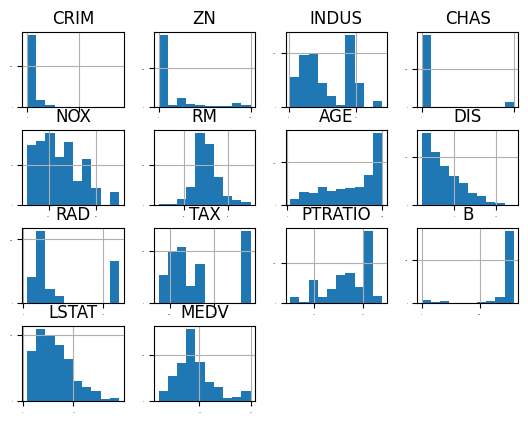

In [20]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

- Exponential: CRIM, ZN, B, DIS
- Gaussian: MEDV, RM
- Bimodal: TAX, RAD

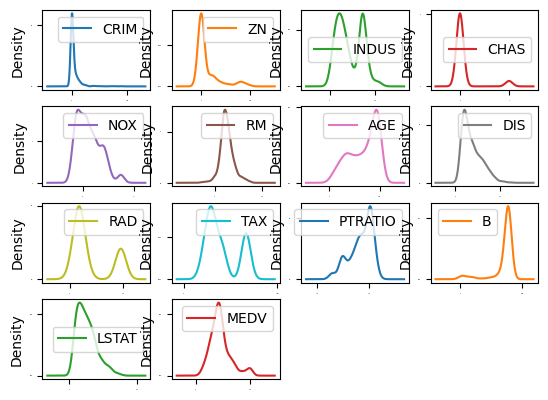

In [23]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1)
pyplot.show()

NOX, RM, LSTAT hare skewed Gaussian 

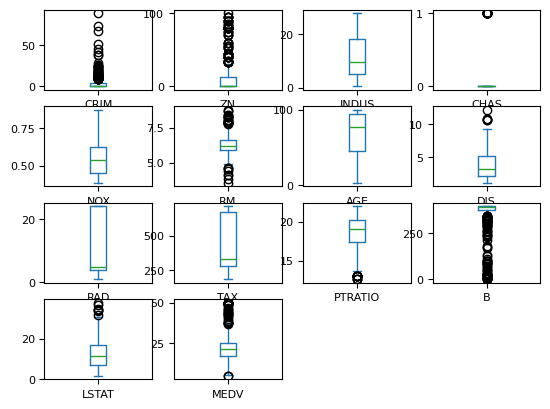

In [25]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8)
pyplot.show()

We can see there are so many outliers in this data CRIM, ZN, B, RM, LSTAT, CHAS, PRATIO

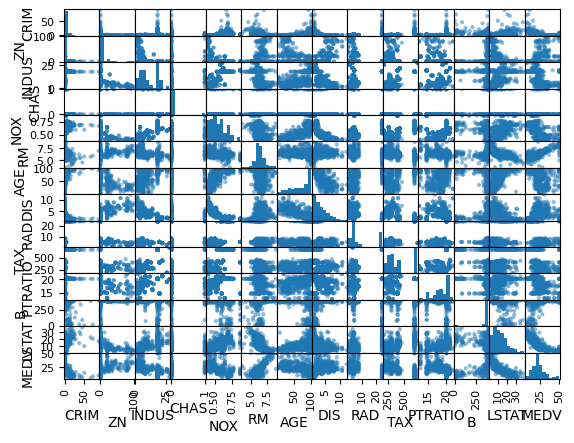

In [27]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

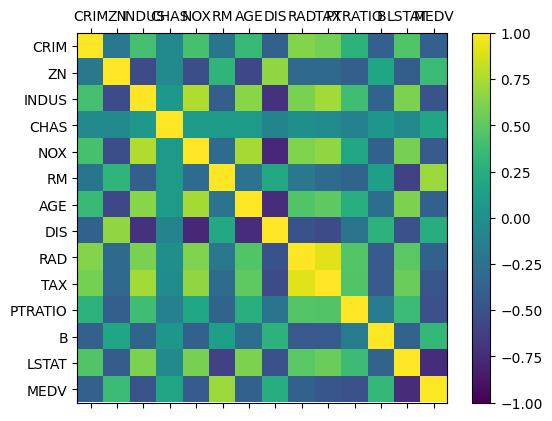

In [34]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

pyplot.show()

There is a lot of structure in this dataaset andwe ned to think about transforms that will expose the structure which could improve the model accuracy
- Feature Selection and reomve correlated attributes
- Normalize the data to reduce differing scales
- Standardise the data to reduce the differing distributions
- With extra time we could explore the possiblity of binning (discretization) of the data to help improve Decision trees 

### Validation Dataset

we are going to make a validation hold-out set which will be used right at the end of the process to validate our model


In [35]:
# Split-out validation dataset

array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

### Evaluate Algorithms: Baseline

We will design our test harness

Gut feeling says LinearRegression or ElasticNet will work well on this data

In [36]:
# Test options and evaluation metric

num_folds = 10
seed=7
scoring = 'neg_mean_squared_error'

In [38]:
# Sport-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [39]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -22.006009 (12.188886)
LASSO: -27.105803 (13.165915)
EN: -27.923014 (13.156405)
KNN: -39.808936 (16.507968)
CART: -27.236005 (18.462897)
SVR: -67.824705 (32.801530)


LR is closest to 0 followed by CART, EN, and LASSO

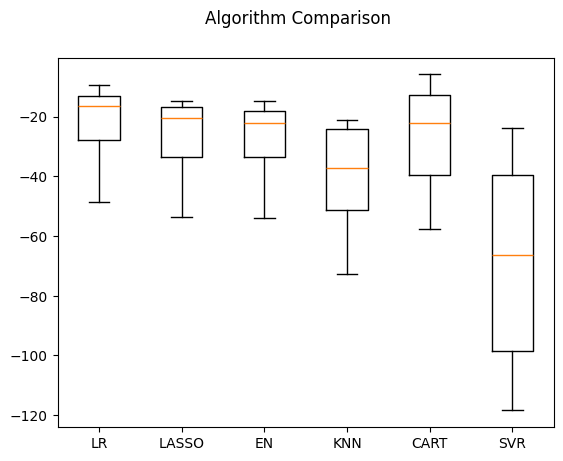

In [40]:
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names) 
pyplot.show()


### Evaluate Algorithm Standardized
- transform the data to values of 0 and 1
- we can use pipelines to avoid data leakage


In [42]:
# standardize the datset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))


In [43]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -22.006009 (12.188886)
ScaledLASSO: -27.205896 (12.124418)
ScaledEN: -28.301160 (13.609110)
ScaledKNN: -21.456867 (15.016218)
ScaledCART: -25.936766 (18.361925)
ScaledSVR: -29.570433 (18.052964)


We can see that KNN was most effected by the scalar.

We can look at the distributions of the scores

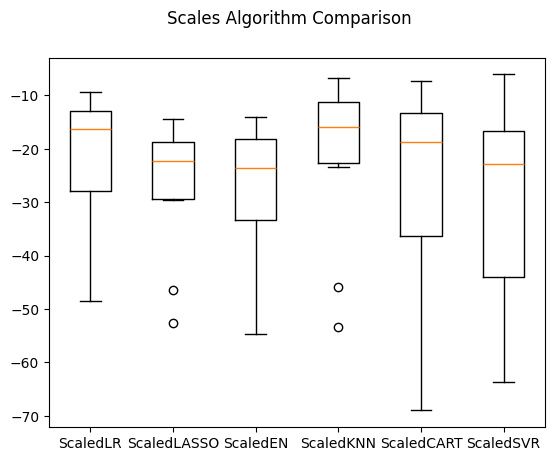

In [44]:
# Compare algorithms
fig = pyplot.figure()
fig.suptitle('Scales Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

KNN has a tight distribution and the best results with smalles variance

### Improve Results with Tuning


In [58]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -19.497829 using {'n_neighbors': np.int64(1)}
-19.497829 (15.769847) with: {'n_neighbors': np.int64(1)}
-20.616855 (12.310542) with: {'n_neighbors': np.int64(2)}
-19.977984 (13.803973) with: {'n_neighbors': np.int64(3)}
-20.776002 (13.531363) with: {'n_neighbors': np.int64(4)}
-21.270967 (14.833544) with: {'n_neighbors': np.int64(5)}
-21.577292 (14.952592) with: {'n_neighbors': np.int64(7)}
-21.001075 (14.701297) with: {'n_neighbors': np.int64(9)}
-21.490306 (14.866957) with: {'n_neighbors': np.int64(11)}
-21.268533 (14.454969) with: {'n_neighbors': np.int64(13)}
-21.968092 (14.209894) with: {'n_neighbors': np.int64(15)}
-22.739880 (14.492752) with: {'n_neighbors': np.int64(17)}
-23.506901 (14.903224) with: {'n_neighbors': np.int64(19)}
-24.240303 (15.156565) with: {'n_neighbors': np.int64(21)}


We have a toss up between 1 and 3

### Ensemble Methods

In [59]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesRegressor(n_estimators=10))])))



In [61]:
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -16.301347 (8.060461)
ScaledGBM: -10.976951 (8.531435)
ScaledRF: -14.033543 (9.293539)
ScaledET: -10.511586 (6.276928)


We get the best performance from the ExtraTreesRegressor but the GBM is close behind.

What is clear is that thye perform better than our linear and nonlinear algorithms.

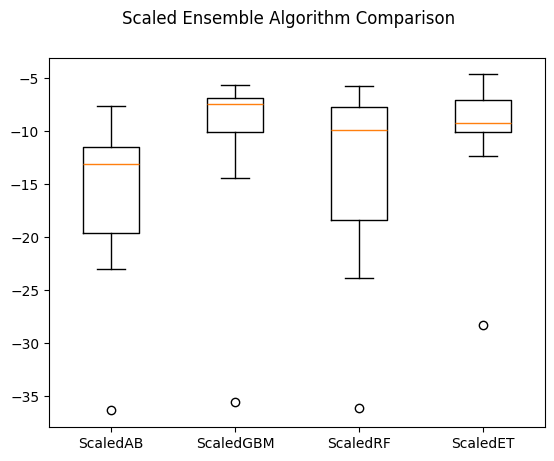

In [64]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

It looks like GBM has a better average but the ET is performed better

### Tuning the Ensemble Methods


In [66]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [68]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -10.560638 using {'n_estimators': np.int64(400)}
-11.629999 (8.833221) with: {'n_estimators': np.int64(50)}
-11.073455 (8.772155) with: {'n_estimators': np.int64(100)}
-10.838924 (8.734377) with: {'n_estimators': np.int64(150)}
-10.785568 (8.657244) with: {'n_estimators': np.int64(200)}
-10.654778 (8.540552) with: {'n_estimators': np.int64(250)}
-10.649385 (8.497232) with: {'n_estimators': np.int64(300)}
-10.589337 (8.413596) with: {'n_estimators': np.int64(350)}
-10.560638 (8.353747) with: {'n_estimators': np.int64(400)}


### Finalize Model


In [70]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators = 400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(n_estimators=400, random_state=7)

In [72]:
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

11.902132586880027
